<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

!pip install statsmodels


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 326.8 kB/s eta 0:00:28
     ---------------------------------------- 0.1/9.2 MB 655.4 kB/s eta 0:00:14
     - -------------------------------------- 0.2/9.2 MB 1.3 MB/s eta 0:00:07
     - -------------------------------------- 0.4/9.2 MB 1.6 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/9.2 MB 2.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.2 MB 1.9 MB/s eta 0:00:05
     --- ------------------------------------ 0.9/9.2 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/9.2 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.2/9.2 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.4/9.2 MB 2.7 MB/s eta 0:00:03
     ------- -------------------------------- 1.6/9.2 MB 2.9 MB/s eta 0:00

####  Leemos los datos a trabajar


In [31]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()

#### Breve resumen del dataset


In [32]:
print(df_comp.columns)

df_comp.KM.mean()

Index(['Fecha', 'KM'], dtype='object')


73506.13089093298

In [33]:
df_comp.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [34]:
df_comp.Fecha.describe()

count            761
unique           761
top       2023-03-18
freq               1
Name: Fecha, dtype: object

In [35]:
df_comp.dtypes

Fecha     object
KM       float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [36]:
df_comp.Fecha = pd.to_datetime(df_comp.Fecha, dayfirst = True)

In [37]:
df_comp.head()

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717


In [38]:
df_comp.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

In [39]:
df_comp.dtypes

Fecha    datetime64[ns]
KM              float64
dtype: object

Seteamos como index del dataset segun el dia

In [40]:
df_comp.set_index("Fecha")

,KM
Fecha,
2023-03-18,66686.513
2023-05-09,105009.277
2023-02-28,80447.065
2023-03-06,103403.154
2023-03-10,102574.717
...,...
2022-04-26,23536.646
2023-06-13,47.508
2022-10-12,49.673


In [41]:
df_comp.head()

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717


In [42]:
df_comp.set_index("Fecha", inplace=True)
df_comp.head()

,KM
Fecha,
2023-03-18,66686.513
2023-05-09,105009.277
2023-02-28,80447.065
2023-03-06,103403.154
2023-03-10,102574.717


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [43]:
df_comp=df_comp.asfreq('d')
df_comp

,KM
Fecha,
2021-09-30,72933.600
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


In [52]:
df_comp=df_comp.asfreq('d')
df_comp.head()

,KM
Fecha,
2021-09-30,72933.600
2021-10-01,73177.190
2021-10-02,NaN
2021-10-03,NaN
2021-10-04,73453.515


In [53]:
df_comp.isna()

,KM
Fecha,
2021-09-30,False
2021-10-01,False
2021-10-02,True
2021-10-03,True
2021-10-04,False
...,...
2023-10-27,False
2023-10-28,True
2023-10-29,True


In [54]:
df_comp.isna().sum()

KM    219
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

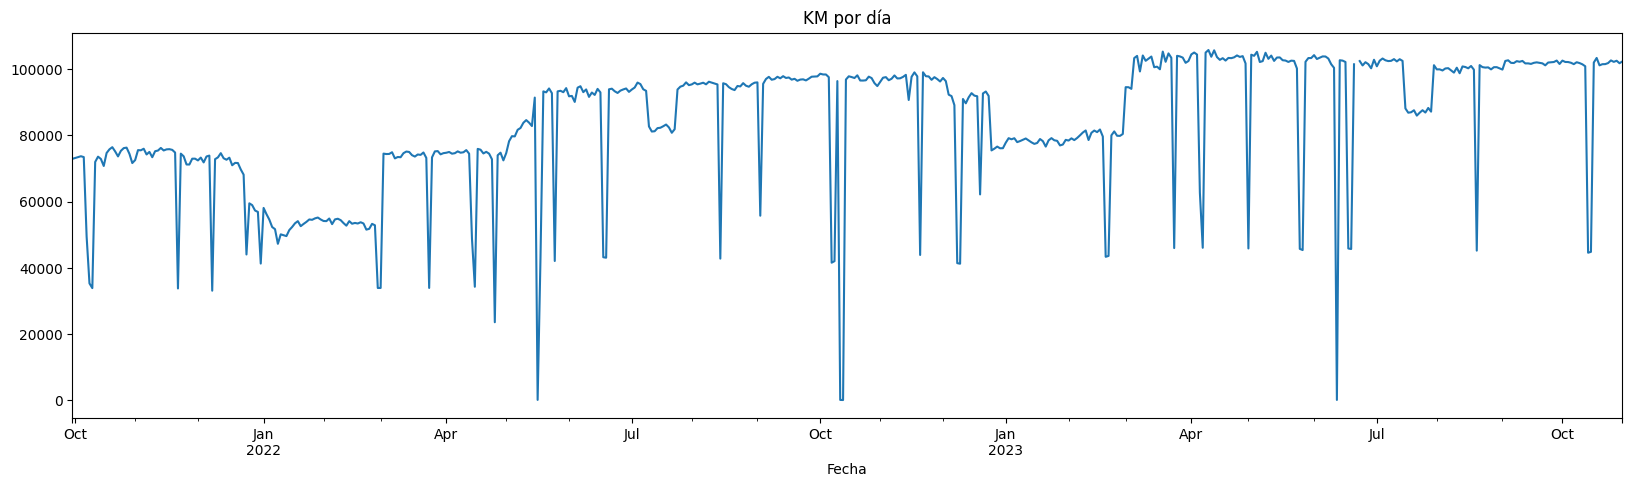

In [47]:
df_comp.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

In [48]:
#df_comp.ftse.plot(figsize=(20,5), title = "Indice bursátil de referencia de la Bolsa de Valores de Londres - FTSE 100")
#plt.show()

*COMENTARIO NUEVO 1*

El grafico hace referencia al indice bursatil de la bolsa de valores de Londres. Es una primera visualizacion de una serie de tiempo, por lo tanto, vemos los valores que toma en cada momento desde 1994 hasta 2018. Los procesos de precios, por lo general, tienen un comportamiento "RANDOM WALK" ( camino aleatorio ) . El mismo  es un proceso en el que una variable cambia de manera aleatoria en cada paso de tiempo, sin seguir un patrón predecible. Es un modelo que representa cambios impredecibles en datos a lo largo del tiempo.

In [49]:
#df_comp.spx.plot(figsize=(20,5))
#df_comp.ftse.plot(figsize=(20,5))
#plt.title("S&P Y FTSE")
#plt.show()

Descomposición de Series Temporales

In [50]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [51]:
s_dec_additive = seasonal_decompose(df_comp.KM, model = "adittive")
s_dec_additive.plot()
plt.show()

ValueError: This function does not handle missing values

*COMENTARIO NUEVO 2*

Al hacer la descomposicion de la serie se pueden observar 4 caracteristicas =
- El ciclo
- La tendecia   
- La estacionalidad  ---> la serie no presenta esta caracteristica. Por ello, se ve asi la grafica.
- Movimientoes irregulares ( el error )

Para mayor informacion, tanto la tendencia como la estacionalidad son componentes de NO estacionariedad. ( dicho termino, se analizara en detalle en las proximos clases )

Descomposicion Multiplicativa

In [ ]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

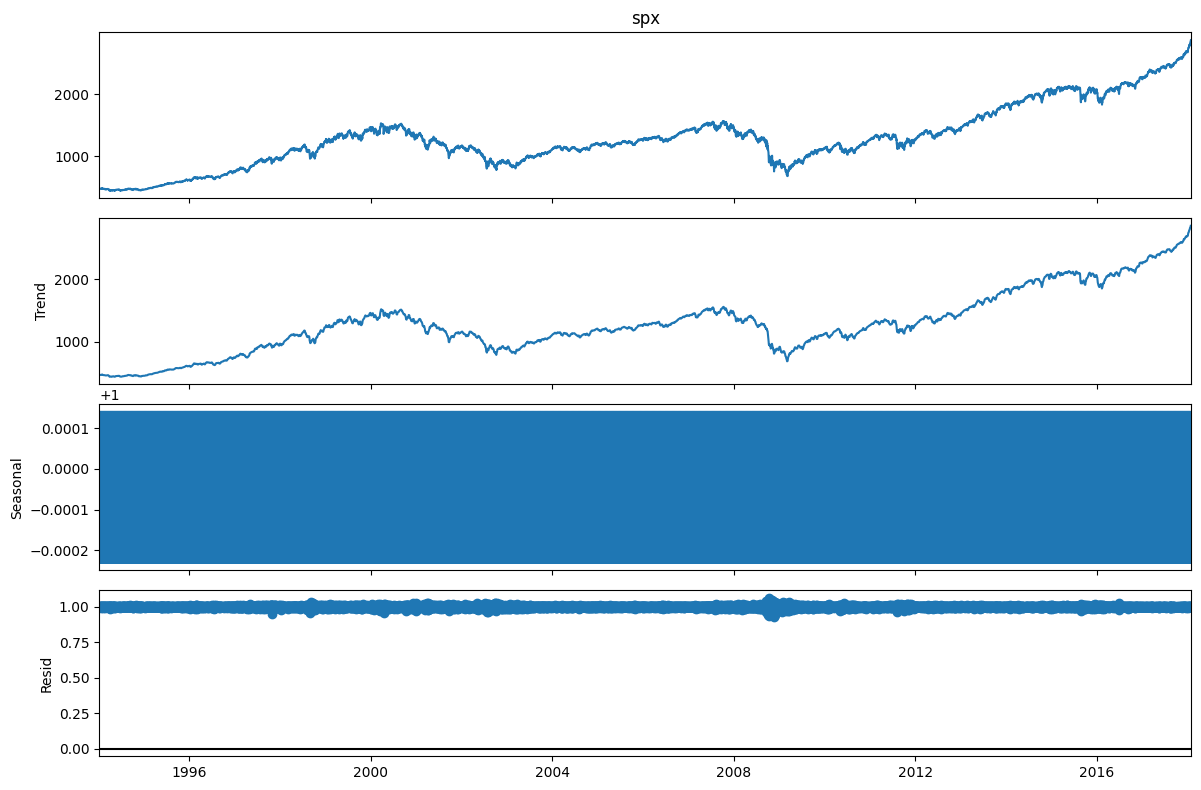

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_comp.spx, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [ ]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [ ]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

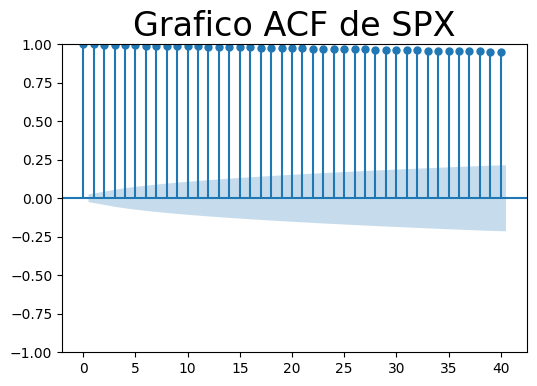

In [ ]:
plot_acf(df_comp.KM,lags=40)
plt.title("Grafico ACF de SPX", size= 24)
plt.show()

*COMENTARIO NUEVO 3*

El grafico es el llamado de autocorrelacion. En el mismo, nos da una primera aproximacion de estacionariedad o no estacionariedad (recuerden que es una primera aproximacion, no definitiva, que luego se testea para confirmar ) .

En este caso, la grafica presenta signos de no estacionarieda. Ya que tiene un decrecimiento lineal que no llega a bajar en el tiempo.

Grafico ACF del indice "DAX"

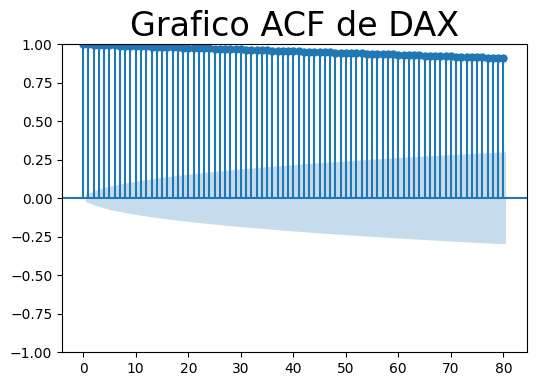

In [ ]:
plot_acf(df_comp.dax,lags=80)
plt.title("Grafico ACF de DAX", size= 24)
plt.show()

Grafico ACF del indice "ftse"

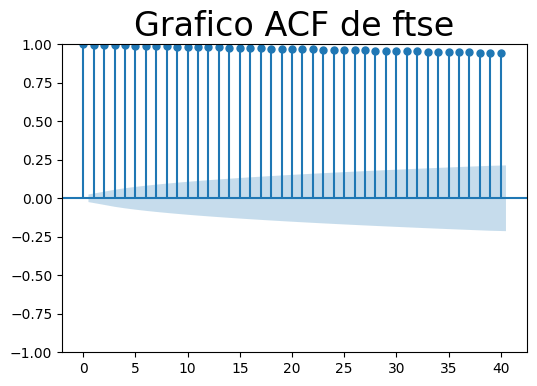

In [ ]:
plot_acf(df_comp.ftse,lags=40)
plt.title("Grafico ACF de ftse", size= 24)
plt.show()

Grafico ACF del indice "nikkei"

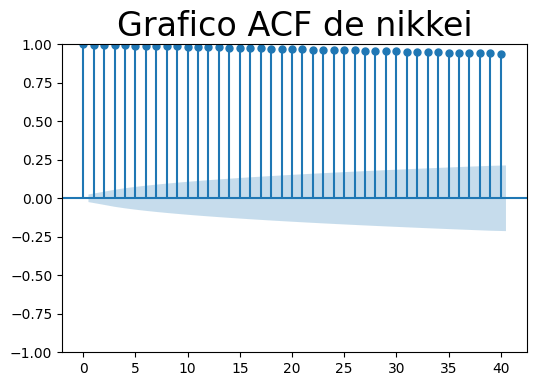

In [ ]:
plot_acf(df_comp.nikkei,lags=40)
plt.title("Grafico ACF de nikkei", size= 24)
plt.show()

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [ ]:
primera_diffs=df_comp.spx.values[1:]-df_comp.spx.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [ ]:
df_comp['primera_diffs_spx']=primera_diffs

In [ ]:
df_comp.head()

,spx,dax,ftse,nikkei,primera_diffs_spx
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,5.37
1994-01-10,475.27,2225.00,3440.58,18443.44,-1.14
1994-01-11,474.13,2228.10,3413.77,18485.25,0.04
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.70
1994-01-13,472.47,2142.37,3360.01,18577.26,2.44


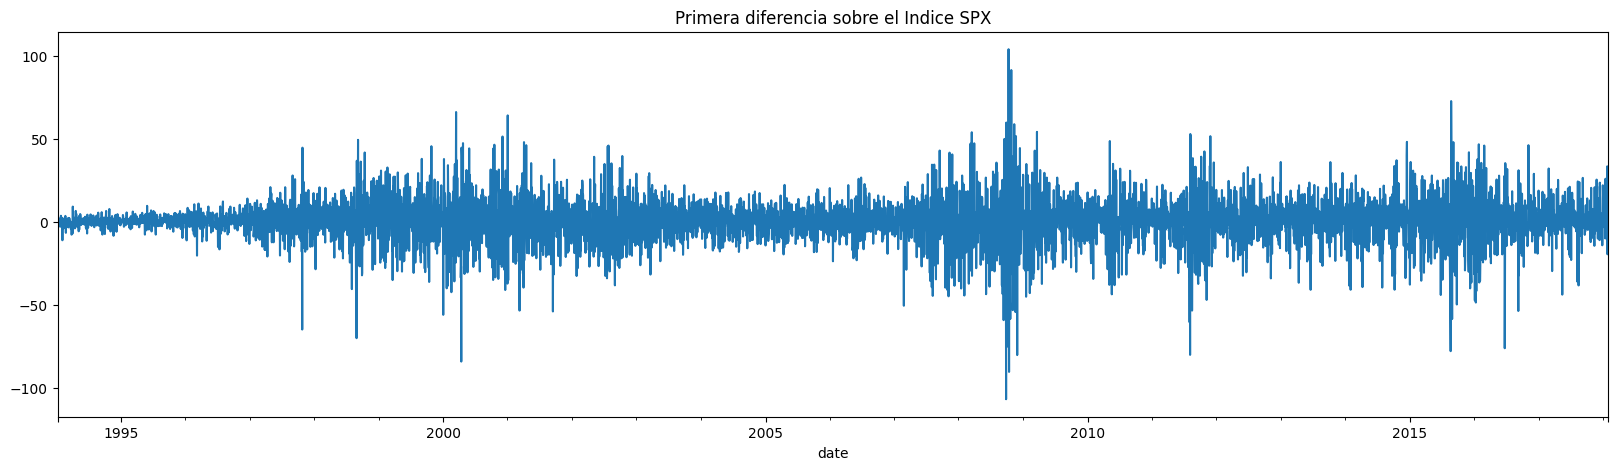

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila
df_comp.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia sobre el Indice SPX")
plt.show()

*COMENTARIO NUEVO 4*

En este caso, vemos la grafica de la primera diferencia de la serie original. Nos muestra una caracteristia del Ruido blanco ( White noise ).

Caracteristicas generales White noise =

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO



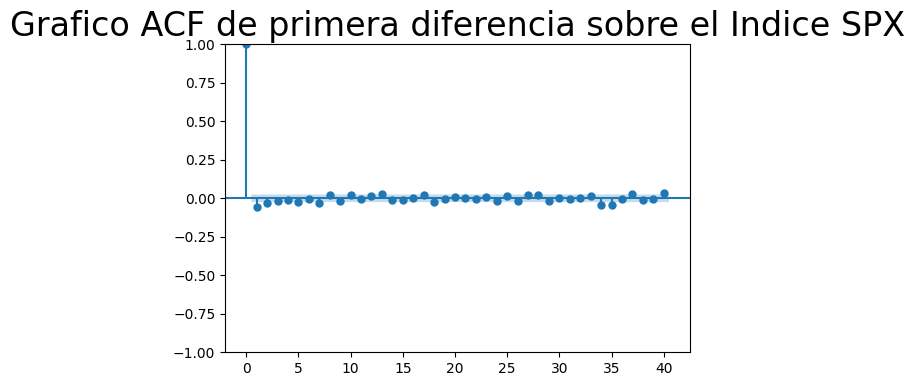

In [ ]:
plot_acf(df_comp.primera_diffs_spx,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Indice SPX", size= 24)
plt.show()

*COMENTARIO NUEVO 5*

En este caso, vemos la funcion de autocorrelacion de la primera diferencia de la serie original.
Vemos el cambio sustancial con respecto a la serie original. El mismo nos podria dar a la interpretacion que estamos en presencia de una serie estacionaria. Recordamos que siempre hay que testear para llegar a la conclusion definitiva.


Ruido Blanco

In [ ]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

,spx,dax,ftse,nikkei,primera_diffs_spx,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,0.379740,1281.548411
std,487.868210,2755.563853,1145.616719,4043.795272,13.552138,486.213486
min,438.920000,1911.700000,2876.600000,7054.980000,-106.621812,-541.983592
25%,992.715221,4070.460000,4486.730000,10701.130000,-5.194203,949.236069
50%,1233.761241,5774.260000,5663.300000,15030.510000,0.305038,1279.621745
75%,1460.250000,7445.560000,6304.630175,17860.470000,6.586405,1610.970217
max,2872.867839,13559.600000,7778.637689,24124.150000,104.136873,3262.068717


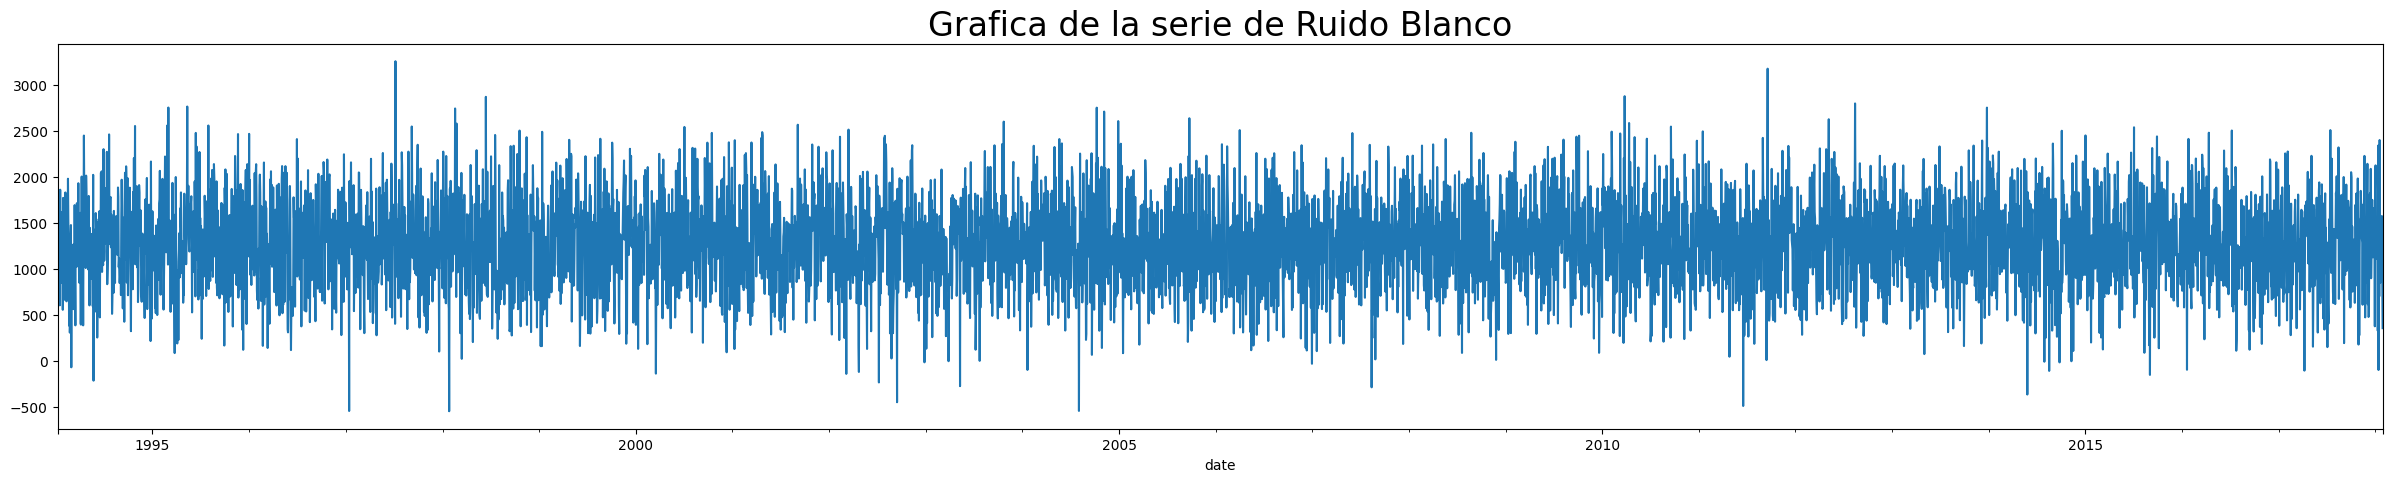

In [ ]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

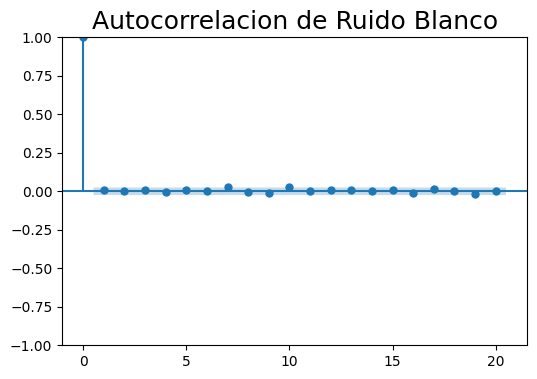

In [ ]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

Random Walk

In [ ]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([ 0.        , -0.2429927 ,  0.86906429,  0.01935054,  0.16751028,
        0.09587586,  1.35863055,  1.06246602,  1.00708139,  1.06443847])

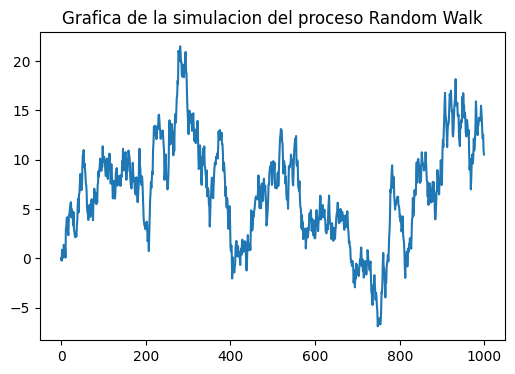

In [ ]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

*COMENTARIO NUEVO 6*

Una vez mas, la grafica simulada del proceso Random Walk, nos muestra una grafica similar a la serie de proceso de precios anterior, ya explicada.


In [ ]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.97964768, 0.95982759, 0.9403022 , 0.92231768,
       0.90341773, 0.88518425, 0.86853194, 0.85082584, 0.83302676,
       0.81407355, 0.79638815, 0.77904903, 0.76253053, 0.74661962,
       0.7303296 , 0.71472397, 0.69643724, 0.67836459, 0.66058778,
       0.6443194 , 0.6289838 , 0.61358063, 0.5992974 , 0.58686672,
       0.57710455, 0.56831485, 0.55789704, 0.54787675, 0.53721863,
       0.5302112 ])

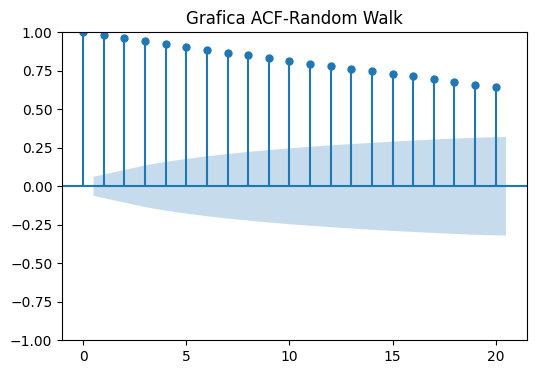

In [ ]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

<body>
  <h1> Muchas gracias! 😀</h1>
</body>